In [3]:
import pandas as pd
import parser


1000
[('ICE HARVESTERS', 'BORN OF COLD AND WINTER AIR AND MOUNTAIN RAIN COMBINING, THIS ICY FORCE BOTH FOUL AND FAIR HAS A FROZEN HEART WORTH MINING.'), ('ICE HARVESTERS', 'CUT THROUGH THE HEART, COLD AND CLEAR. STRIKE FOR LOVE AND STRIKE FOR FEAR.'), ('ICE HARVESTERS', 'Hup! Ho! Watch your step! Let it go!'), ('ICE HARVESTERS', "BEAUTIFUL! POWERFUL! DANGEROUS! COLD! ICE HAS A MAGIC CAN'T BE CONTROLLED."), ('ICE HARVESTERS', 'STRONGER THAN ONE, STRONGER THAN TEN STRONGER THAN A HUNDRED MEN!'), ('ICE HARVESTERS', 'BORN OF COLD AND WINTER AIR AND MOUNTAIN RAIN COMBINING'), ('ICE HARVESTERS', 'THIS ICY FORCE BOTH FOUL AND FAIR HAS A FROZEN HEART WORTH MINING. CUT THROUGH THE HEART, COLD AND CLEAR.'), ('ICE HARVESTERS', "STRIKE FOR LOVE AND STRIKE FOR FEAR. THERE'S BEAUTY AND THERE'S DANGER HERE. SPLIT THE ICE APART! BEWARE THE FROZEN HEART."), ('YOUNG ANNA', 'Elsa. Psst. Elsa! Psst.'), ('YOUNG ANNA', 'Wake up. Wake up. Wake up.'), ('YOUNG ELSA', ' Anna, go back to sleep.'), ('YOUNG ANNA',

In [4]:
data = parser.parse("Frozen-(Disney).txt")

In [10]:
#importing all the necessary modules
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [32]:
data

[('ICE HARVESTERS',
  'BORN OF COLD AND WINTER AIR AND MOUNTAIN RAIN COMBINING, THIS ICY FORCE BOTH FOUL AND FAIR HAS A FROZEN HEART WORTH MINING.'),
 ('ICE HARVESTERS',
  'CUT THROUGH THE HEART, COLD AND CLEAR. STRIKE FOR LOVE AND STRIKE FOR FEAR.'),
 ('ICE HARVESTERS', 'Hup! Ho! Watch your step! Let it go!'),
 ('ICE HARVESTERS',
  "BEAUTIFUL! POWERFUL! DANGEROUS! COLD! ICE HAS A MAGIC CAN'T BE CONTROLLED."),
 ('ICE HARVESTERS',
  'STRONGER THAN ONE, STRONGER THAN TEN STRONGER THAN A HUNDRED MEN!'),
 ('ICE HARVESTERS', 'BORN OF COLD AND WINTER AIR AND MOUNTAIN RAIN COMBINING'),
 ('ICE HARVESTERS',
  'THIS ICY FORCE BOTH FOUL AND FAIR HAS A FROZEN HEART WORTH MINING. CUT THROUGH THE HEART, COLD AND CLEAR.'),
 ('ICE HARVESTERS',
  "STRIKE FOR LOVE AND STRIKE FOR FEAR. THERE'S BEAUTY AND THERE'S DANGER HERE. SPLIT THE ICE APART! BEWARE THE FROZEN HEART."),
 ('YOUNG ANNA', 'Elsa. Psst. Elsa! Psst.'),
 ('YOUNG ANNA', 'Wake up. Wake up. Wake up.'),
 ('YOUNG ELSA', ' Anna, go back to sleep.'

In [6]:
len(data)

1000

In [30]:
type(data[0])

tuple

In [43]:
def charpick(name, script):
    sentences = []
    for line in script:
        if line[0] == name:
            sentences.append(line[1].split())
    return sentences

In [51]:
#word2vec method, sentence has to be a list; string
def wordvec(sentences):
    model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)
    word_vectors = model.wv
    vocabs = word_vectors.vocab.keys()
    word_vectors_list = [word_vectors[v] for v in vocabs]
    
    #print(word_vectors.similarity(w1=))
    return [vocabs, word_vectors_list,model]

In [44]:
annalines = charpick('ANNA', data)

In [46]:
annalines

[['DO', 'YOU', 'WANT', 'TO', 'BUILD', 'A', 'SNOWMAN?'],
 ['OR',
  'RIDE',
  'OUR',
  'BIKE',
  'AROUND',
  'THE',
  'HALL?',
  'I',
  'THINK',
  'SOME',
  'COMPANY',
  'IS',
  'OVERDUE...'],
 ["I'VE",
  'STARTED',
  'TALKING',
  'TO',
  'THE',
  'PICTURES',
  'ON',
  'THE',
  'WALLS.'],
 ['Hang', 'in', 'there,', 'Joan.'],
 ['IT', 'GETS', 'A', 'LITTLE', 'LONELY', 'ALL', 'THESE', 'EMPTY', 'ROOMS.'],
 ['JUST', 'WATCHING', 'THE', 'HOURS', 'TICK', 'BY.'],
 ['TICK', 'TOCK.', 'TICK', 'TOCK.', 'TICK', 'TOCK.'],
 ['Elsa?',
  'PLEASE',
  'I',
  'KNOW',
  "YOU'RE",
  'IN',
  'THERE',
  'PEOPLE',
  'ARE',
  'ASKING',
  'WHERE',
  "YOU'VE",
  'BEEN',
  'THEY',
  'SAY',
  'HAVE',
  'COURAGE',
  'AND',
  "I'M",
  'TRYING',
  'TO',
  "I'M",
  'RIGHT',
  'OUT',
  'HERE',
  'FOR',
  'YOU.',
  'PLEASE',
  'LET',
  'ME',
  'IN.'],
 ['WE',
  'ONLY',
  'HAVE',
  'EACH',
  'OTHER.',
  "IT'S",
  'JUST',
  'YOU',
  'AND',
  'ME.',
  'WHAT',
  'ARE',
  'WE',
  'GONNA',
  'DO?',
  'DO',
  'YOU',
  'WANT',
  'TO'

In [52]:
anna = wordvec(annalines)

### PCA visualization

In [59]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(12,10))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))

In [38]:
pca = PCA(n_components=2)
xys = pca.fit_transform(anna[1])
xs = xys[:,0]
ys = xys[:,1]

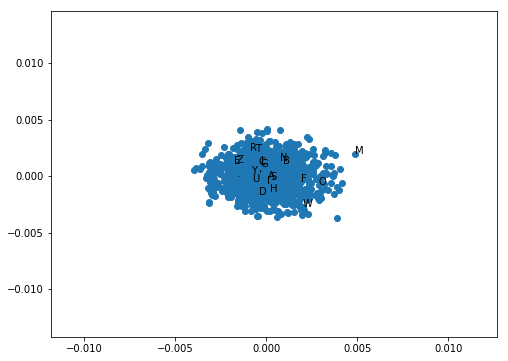

In [39]:
plot_2d_graph(test1[0], xs, ys)

### Merge with the google model

In [53]:
file_name = "GoogleNews-vectors-negative300.bin"
anna[2].intersect_word2vec_format(fname=file_name, binary=True)

In [54]:
word_vectors = anna[2].wv

In [55]:
vocabs = word_vectors.vocab.keys()

In [56]:
word_vectors_list = [word_vectors[v] for v in vocabs]

In [57]:
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

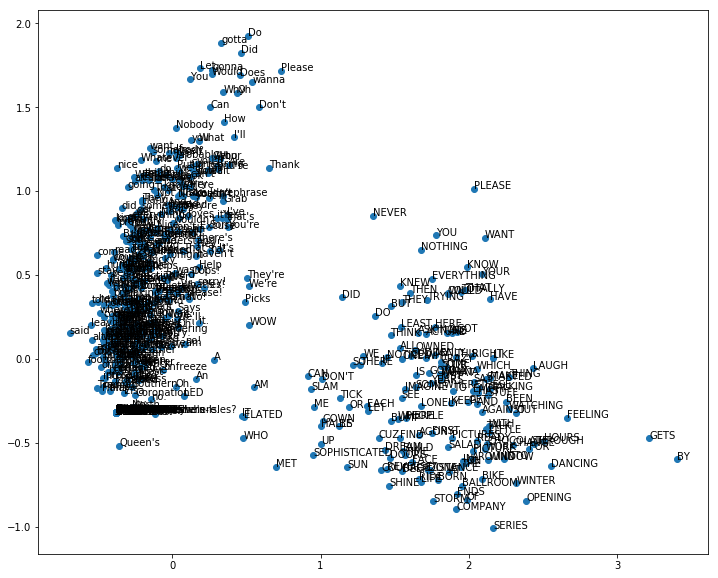

In [60]:
plot_2d_graph(vocabs, xs, ys)